<a href="https://colab.research.google.com/github/GangaBisht/Fraud_Mitigation/blob/master/02_Merged_Preprocessed_Data_withFeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.getcwd()

'/content'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
# memory management
import gc


In [4]:
skipcols = ['Unnamed: 0','Hour','Unnamed: 0.1']

#trafficWith15minFlow_accident_weather_df
df=pd.read_excel('trafficWith15minFlow_accident_weather_df.xlsx', usecols=lambda x: x not in skipcols)
df.head(2)

,Date,Hourly Pressure at Mean Sea Level (hPa),Hourly Temperature (°C),Hourly Rainfall Total (mm),Hourly Snow Depth (cm),Hourly Mean Wind Direction (degrees),Hourly Mean Windspeed (knots),Hourly Maximum Gust (knots),Hourly Visibility (metres),Hourly Relative Humidity (%),Hourly Total Cloud Cover (oktas),Local Date_ Local Time,Day Type ID,Total Carriageway Flow,Total Flow vehicles less than 5.2m,Total Flow vehicles 5.21m - 6.6m,Total Flow vehicles 6.61m - 11.6m,Total Flow vehicles above 11.6m,Speed Value,Average Speed in MPH,Cat 1 Speed Count,Cat 2 Speed Count,Cat 3 Speed Count,Cat 4 Speed Count,Cat 5 Speed Count,Cat 6 Speed Count,Cat 7 Speed Count,Cat 8 Speed Count,Cat 9 Speed Count,Cat 10 Speed Count,Cat 11 Speed Count,Cat 12 Speed Count,Cat 13 Speed Count,Cat 14 Speed Count,Cat speed counts included flag,Direction,DirectionCode,Road 1,Class,Accident_Index,timedelta,Day,Month,Year,Minutes,Seconds
0,2019-04-01,1042.9,0.9,0.0,0,280,2,5,8000,90.0,8,2019-04-01 00:14:00,6,134,116,7,4,7,105.11,65.31,0,0,0,0,0,0,1,1,7,7,17,52,31,18,True,J1toJ2,1,Motorway606,0,NaN,NaN,1,4,2019,14,0
1,2019-04-01,1042.9,0.9,0.0,0,280,2,5,8000,90.0,8,2019-04-01 00:29:00,6,123,108,5,4,6,106.93,66.44,0,0,0,0,0,0,0,2,0,13,18,38,30,22,True,J1toJ2,1,Motorway606,0,NaN,NaN,1,4,2019,29,0


In [5]:
df.columns

Index(['Date', 'Hourly Pressure at Mean Sea Level (hPa)',
       'Hourly Temperature (°C)', 'Hourly Rainfall Total (mm)',
       'Hourly Snow Depth (cm)', 'Hourly Mean Wind Direction (degrees)',
       'Hourly Mean Windspeed (knots)', 'Hourly Maximum Gust (knots)',
       'Hourly Visibility (metres)', 'Hourly Relative Humidity (%)',
       'Hourly Total Cloud Cover (oktas)', 'Local Date_ Local Time',
       ' Day Type ID', ' Total Carriageway Flow',
       ' Total Flow vehicles less than 5.2m',
       ' Total Flow vehicles 5.21m - 6.6m',
       ' Total Flow vehicles 6.61m - 11.6m',
       ' Total Flow vehicles above 11.6m', ' Speed Value',
       ' Average Speed in MPH', ' Cat 1 Speed Count', ' Cat 2 Speed Count',
       ' Cat 3 Speed Count', ' Cat 4 Speed Count', ' Cat 5 Speed Count',
       ' Cat 6 Speed Count', ' Cat 7 Speed Count', ' Cat 8 Speed Count',
       ' Cat 9 Speed Count', ' Cat 10 Speed Count', ' Cat 11 Speed Count',
       ' Cat 12 Speed Count', ' Cat 13 Speed Count', ' 

In [6]:
df.drop(['Date','Local Date_ Local Time','timedelta','Accident_Index','Direction'	], axis = 1, inplace = True) 
#df.drop(['Direction'], inplace=True, axis=1)

In [7]:
#Identify single unique value
unique_count= df.nunique()
unique_single_df = pd.DataFrame(unique_count[unique_count == 1]).reset_index().rename(columns = {'index': 'feature', 
                                                                                                     0: 'nunique'})
drop_lst = list(unique_single_df['feature'])
print(drop_lst)
#single_unique = list(unique_count[unique_count==1])
#single_unique
df_1 = df.drop(columns = drop_lst)
#df_1

[' Cat speed counts included flag', 'Road 1', 'Year', 'Seconds']


In [8]:
df_1.columns

Index(['Hourly Pressure at Mean Sea Level (hPa)', 'Hourly Temperature (°C)',
       'Hourly Rainfall Total (mm)', 'Hourly Snow Depth (cm)',
       'Hourly Mean Wind Direction (degrees)', 'Hourly Mean Windspeed (knots)',
       'Hourly Maximum Gust (knots)', 'Hourly Visibility (metres)',
       'Hourly Relative Humidity (%)', 'Hourly Total Cloud Cover (oktas)',
       ' Day Type ID', ' Total Carriageway Flow',
       ' Total Flow vehicles less than 5.2m',
       ' Total Flow vehicles 5.21m - 6.6m',
       ' Total Flow vehicles 6.61m - 11.6m',
       ' Total Flow vehicles above 11.6m', ' Speed Value',
       ' Average Speed in MPH', ' Cat 1 Speed Count', ' Cat 2 Speed Count',
       ' Cat 3 Speed Count', ' Cat 4 Speed Count', ' Cat 5 Speed Count',
       ' Cat 6 Speed Count', ' Cat 7 Speed Count', ' Cat 8 Speed Count',
       ' Cat 9 Speed Count', ' Cat 10 Speed Count', ' Cat 11 Speed Count',
       ' Cat 12 Speed Count', ' Cat 13 Speed Count', ' Cat 14 Speed Count',
       'DirectionCod

In [9]:
X_data = df_1.drop('Class', axis=1)
Y_class = df_1['Class']
X_data.shape
Y_class.shape

(109791,)

In [10]:
print(df_1.shape)
print(X_data.shape)
print(Y_class.shape)
#X = X.reshape(X.shape[1:])

(109791, 37)
(109791, 36)
(109791,)


In [11]:
corr = X_data.corr().abs()
#corr_series=corr.unstack().sort_values(kind="quicksort")

upper = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(np.bool))
upper
high_corr_lst = [column for column in upper.columns if any(upper[column] > 0.9)]
high_corr_lst


['Hourly Maximum Gust (knots)',
 ' Total Flow vehicles less than 5.2m',
 ' Total Flow vehicles 6.61m - 11.6m',
 ' Average Speed in MPH']

In [12]:
collinear_df = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

for column in high_corr_lst:
            # Find the correlated features
            corr_features = list(upper.index[upper[column].abs() > 0.9])
            # Find the correlated values
            corr_values = list(upper[column][upper[column].abs() > 0.9])
            drop_features = [column for _ in range(len(corr_features))]   
            temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                             'corr_feature': corr_features,
                                             'corr_value': corr_values})

            # Add to dataframe
            collinear_df = collinear_df.append(temp_df, ignore_index = True)

In [13]:
collinear_df

,drop_feature,corr_feature,corr_value
0,Hourly Maximum Gust (knots),Hourly Mean Windspeed (knots),0.948847
1,Total Flow vehicles less than 5.2m,Total Carriageway Flow,0.990379
2,Total Flow vehicles 6.61m - 11.6m,Total Flow vehicles 5.21m - 6.6m,0.900928
3,Average Speed in MPH,Speed Value,1.000000


In [14]:

df_2=df_1.drop(columns=high_corr_lst)
df_2.head()

,Hourly Pressure at Mean Sea Level (hPa),Hourly Temperature (°C),Hourly Rainfall Total (mm),Hourly Snow Depth (cm),Hourly Mean Wind Direction (degrees),Hourly Mean Windspeed (knots),Hourly Visibility (metres),Hourly Relative Humidity (%),Hourly Total Cloud Cover (oktas),Day Type ID,Total Carriageway Flow,Total Flow vehicles 5.21m - 6.6m,Total Flow vehicles above 11.6m,Speed Value,Cat 1 Speed Count,Cat 2 Speed Count,Cat 3 Speed Count,Cat 4 Speed Count,Cat 5 Speed Count,Cat 6 Speed Count,Cat 7 Speed Count,Cat 8 Speed Count,Cat 9 Speed Count,Cat 10 Speed Count,Cat 11 Speed Count,Cat 12 Speed Count,Cat 13 Speed Count,Cat 14 Speed Count,DirectionCode,Class,Day,Month,Minutes
0,1042.9,0.9,0.0,0,280,2,8000,90.0,8,6,134,7,7,105.11,0,0,0,0,0,0,1,1,7,7,17,52,31,18,1,0,1,4,14
1,1042.9,0.9,0.0,0,280,2,8000,90.0,8,6,123,5,6,106.93,0,0,0,0,0,0,0,2,0,13,18,38,30,22,1,0,1,4,29
2,1042.9,0.9,0.0,0,280,2,8000,90.0,8,6,95,0,6,104.24,0,0,0,0,0,0,0,0,4,9,11,44,16,11,1,0,1,4,44
3,1042.9,0.9,0.0,0,280,2,8000,90.0,8,6,100,4,6,107.19,0,0,0,0,0,0,0,1,1,6,7,48,30,7,1,0,1,4,59
4,1042.9,0.9,0.0,0,280,2,8000,90.0,8,6,134,7,7,105.11,0,0,0,0,0,0,1,1,7,7,17,52,31,18,1,0,1,4,14


In [15]:
#df_2.to_excel('Merged_15minTrafficFlow_Preprocessed_Data.xlsx', index = False)


In [16]:
#check for columns which has value 0 for all rows 
#(df_2 == 0).all(axis=0)

In [17]:
#pd.isnull(np.array([np.nan, 0], dtype=float))
#pd.isnull(np.array([np.nan, 0], dtype=object))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


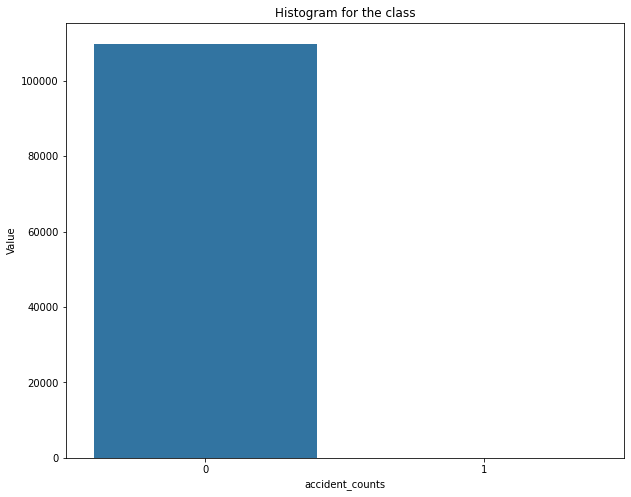

In [18]:
accident_counts = df_2['Class'].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the class")
sns.barplot(accident_counts.index, accident_counts.values)
plt.xlabel("accident_counts")
plt.ylabel("Value")
plt.show()

In [19]:
#df_2.drop('Direction',axis=1,inplace=True)
X_df = df_2.drop('Class', axis=1)
Y_df = df_2['Class']
print(X_df.shape)
print(Y_df.shape)

X_data=X_df.values
Y_class=Y_df.values

(109791, 32)
(109791,)


In [20]:
print(X_data.shape)
print(Y_class.shape)

(109791, 32)
(109791,)


In [21]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
X_data_scaled = scaler.fit_transform(X_data)
#print(X_data_scaled)

In [22]:
 #Apply gradient boosting algorithm to identify the features with zero importance.
  #      The gbm is trained with early stopping using a validation fraction to prevent overfitting. 
   #     The feature importances are averaged over iteration to reduce variance. 


# Extract feature names
feature_names = list(X_df.columns)
# Convert to np array
X = X_data_scaled.tolist()
y = Y_class.tolist()

# Create empty array for feature importances
feat_imp_val = np.zeros(len(feature_names))
loop=10

# loop through each fold
for a in range(loop):

      model = GradientBoostingClassifier(n_estimators=1000, 
                                         validation_fraction=0.20,
                                         n_iter_no_change=100, 
                                         tol=0.01,
                                         learning_rate = 0.05,
                                         #verbose = -1
                                         )
      train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20, random_state=0)
      model.fit(train_X, train_y )
      # memory management
      gc.enable()
      del train_X, test_X, train_y, test_y
      gc.collect()
             
      # Calculate feature importances and save in the variable
      feat_imp_val += model.feature_importances_ / loop

      feat_imp = pd.DataFrame({'feature': feature_names, 'importance': feat_imp_val})

      # use importance to sort the features
      feat_imp = feat_imp.sort_values('importance', ascending = False).reset_index(drop = True)

        # Normalize the feature importances to add up to one
      feat_imp['normalized_importance'] = feat_imp['importance'] / feat_imp['importance'].sum()
      feat_imp['cumulative_importance'] = np.cumsum(feat_imp['normalized_importance'])

        # Extract the features with zero importance
      record_zero_importance = feat_imp[feat_imp['importance'] == 0.0]
        
      to_drop = list(record_zero_importance['feature'])
      print('\n%d features with zero importance\n' % len(to_drop))    



12 features with zero importance


8 features with zero importance


7 features with zero importance


7 features with zero importance


6 features with zero importance


6 features with zero importance


6 features with zero importance


6 features with zero importance


6 features with zero importance


6 features with zero importance



In [23]:
zero_imp=record_zero_importance['feature'].tolist()
zero_imp


[' Cat 4 Speed Count',
 ' Cat 2 Speed Count',
 ' Cat 1 Speed Count',
 'Hourly Snow Depth (cm)',
 'Hourly Rainfall Total (mm)',
 ' Cat 3 Speed Count']

In [24]:
print(df_2.shape)
df_3=df_2.drop(columns=zero_imp)
print(df_3.shape)


(109791, 33)
(109791, 27)


In [25]:
df_3.to_excel('Merged_15minTrafficFlow_Preprocessed_After_Feature_Selection_Data.xlsx', index=False)


In [26]:
df_3['Class'].value_counts()

0    109785
1         6
Name: Class, dtype: int64